<img src=assets/UBA_header.png>

# **Universidad de Buenos Aires**

### Carrera de Especializaci√≥n en Inteligencia Artificial
<br>

## **Proyecto final - Aprendizaje de M√°quina**

### Cohorte 22 - A√±o 2025

## Autores
- [SIU a2208] Ariel Matias Cabello <arielmcabello@gmail.com>
- [SIU a2213] Ignacio Agustin Costarelli <agustin@costarellisa.com.ar>
- [SIU a2214] Alex Mart√≠n Curellich <alexcurellich@gmail.com>
<br>
<br>
### Este repositorio contiene el material de resoluci√≥n del Trabajo pr√°ctico integrador correspondiente correspondiente a la asignatura de Aprendizaje de m√°quina.

# Imports y config iniciales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

# Ingesta del dataset

In [2]:
# Read dataset
path = pathlib.Path("dataset/one_million_mushrooms.csv")
df = pd.read_csv(path, delimiter=';')

# 1. Analisis exploratorio de datos

Antes de abordar cualquier modelo de aprendizaje autom√°tico, resulta fundamental realizar un an√°lisis exploratorio de los datos (EDA). Este proceso nos permite comprender la estructura del conjunto de datos, detectar posibles inconsistencias o valores faltantes, identificar relaciones entre variables y, en general, obtener una primera impresi√≥n de la informaci√≥n disponible. En tal sentido se llev√≥ a cabo un an√°lisis etructurado seg√∫n las siguientes etapas:

- Revisi√≥n general del dataset
- Distribuci√≥n de variables num√©ricas
- Distribuci√≥n de variables categ√≥ricas
- An√°lisis de valores faltantes y duplicados
- Identificaci√≥n de outliers y posibles inconsistencias
- An√°lisis de correlaciones entre variables

### 1.1. Revisi√≥n general del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038000 entries, 0 to 1037999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   class                 1038000 non-null  object 
 1   cap-diameter          1038000 non-null  float64
 2   cap-shape             1038000 non-null  object 
 3   cap-surface           798000 non-null   object 
 4   cap-color             1038000 non-null  object 
 5   does-bruise-or-bleed  1038000 non-null  object 
 6   gill-attachment       870000 non-null   object 
 7   gill-spacing          612000 non-null   object 
 8   gill-color            1038000 non-null  object 
 9   stem-height           1038000 non-null  float64
 10  stem-width            1038000 non-null  float64
 11  stem-root             162000 non-null   object 
 12  stem-surface          390000 non-null   object 
 13  stem-color            1038000 non-null  object 
 14  veil-type             54000 non-nu

| Columna               | Tipo    | Descripci√≥n general                                                                              | Valores posibles                                                                                                                                            |
|------------------------|---------|---------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| class                  | categ. | Clase del hongo seg√∫n su toxicidad                                                                | e = comestible, p = venenoso                                                                                                                                |
| cap-diameter (cm)      | num.   | Di√°metro del sombrero (p√≠leo)                                                                      | n√∫mero flotante en cm                                                                                                                                       |
| cap-shape              | categ. | Forma del sombrero                                                                                | b = campana, c = c√≥nica, x = convexa, f = plana, s = hundida, p = esf√©rica, o = otras                                                                        |
| cap-surface            | categ. | Textura de la superficie del sombrero                                                             | i = fibrosa, g = con surcos, y = escamosa, s = lisa, h = brillante, l = cori√°cea, k = sedosa, t = pegajosa, w = arrugada, e = carnosa                        |
| cap-color              | categ. | Color del sombrero                                                                               | n = marr√≥n, b = beige, g = gris, r = verde, p = rosa, u = p√∫rpura, e = rojo, w = blanco, y = amarillo, l = azul, o = naranja, k = negro                        |
| does-bruise-bleed      | categ. | Indica si presenta moretones o sangrado al cortarse                                              | t = s√≠, f = no                                                                                                                                              |
| gill-attachment        | categ. | Forma en que las laminillas se unen al tallo                                                     | a = adnada, x = adnexada, d = decurrente, e = libre, s = sinuada, p = poros, f = ninguna, ? = desconocido                                                   |
| gill-spacing           | categ. | Separaci√≥n entre las laminillas                                                                 | c = cerrada, d = distante, f = ninguna                                                                                                                     |
| gill-color             | categ. | Color de las laminillas                                                                          | igual a cap-color + f = ninguna                                                                                                                            |
| stem-height (cm)       | num.   | Altura del tallo                                                                                | n√∫mero flotante en cm                                                                                                                                       |
| stem-width (mm)        | num.   | Grosor del tallo                                                                                | n√∫mero flotante en mm                                                                                                                                       |
| stem-root              | categ. | Forma de la base del tallo                                                                      | b = bulbosa, s = hinchada, c = en maza, u = copa, e = igual, z = rizomorfa, r = enraizada                                                                   |
| stem-surface           | categ. | Textura de la superficie del tallo                                                              | igual a cap-surface + f = ninguna                                                                                                                          |
| stem-color             | categ. | Color del tallo                                                                                | igual a cap-color + f = ninguno                                                                                                                            |
| veil-type              | categ. | Tipo de velo                                                                                   | p = parcial, u = universal                                                                                                                                  |
| veil-color             | categ. | Color del velo                                                                                 | igual a cap-color + f = ninguno                                                                                                                            |
| has-ring               | categ. | Indica si el tallo tiene anillo                                                                | t = s√≠, f = no                                                                                                                                              |
| ring-type              | categ. | Tipo de anillo                                                                                 | c = telara√±a, e = evanescente, r = abierto, g = surcado, l = grande, p = colgante, s = envolvente, z = zona, y = escamoso, m = m√≥vil, f = ninguno, ? = desconocido |
| spore-print-color      | categ. | Color de la impresi√≥n de esporas                                                                | igual a cap-color                                                                                                                                          |
| habitat                | categ. | H√°bitat donde crece                                                                            | g = pastos, l = hojas, m = praderas, p = senderos, h = brezales, u = urbano, w = desechos, d = bosques                                                      |
| season                 | categ. | Estaci√≥n en que aparece                                                                        | s = primavera, u = verano, a = oto√±o, w = invierno                                                                                       

Como se puede observar en la informaci√≥n precedente, el dataset contiene $1.038.000$ registros y $21$ columnas, de las cuales 18 son categ√≥ricas y 3 num√©ricas (`cap-diameter`, `stem-height` y `stem-width`).<br>
<br>
La variable objetivo (`class`) indica si el hongo es comestible (`e`) o venenoso (`p`), trat√°ndose entonces de un problema de clasificaci√≥n binaria.<br>
<br>
La inspecci√≥n con `df.info()` permiti√≥ confirmar que varias columnas presentan valores faltantes en diferentes proporciones. Esto nos sugiere la necesidad de tratarlos (imputaci√≥n, eliminaci√≥n o transformaci√≥n) seg√∫n su relevancia en el modelado. Este tema se abordar√° m√°s adelante.

In [4]:
df.head(5)

class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p          5.68         c           e         w                    t   
1     e          5.62         f           s         n                    f   
2     p         17.29         x           s         n                    f   
3     p          6.16         b           s         n                    f   
4     p          4.46         o           t         n                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               x            c          r         6.73  ...        NaN   
1               s            c          w         6.10  ...          b   
2               p          NaN          y         6.80  ...        NaN   
3             NaN          NaN          w         9.33  ...        NaN   
4             NaN            c          w         0.00  ...          f   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0          NaN          w       NaN        NaN        f         f   
1            i          n       NaN        NaN        f         f   
2          NaN          n       NaN        NaN        f         f   
3            s          w       NaN        NaN        t         z   
4            f          f       NaN        NaN        f         f   

  spore-print-color habitat season  
0               NaN       g      u  
1               NaN       m      u  
2               NaN       d      a  
3               NaN       d      s  
4                 n       d      u  

[5 rows x 21 columns]

### 1.2. Distribuci√≥n de variables num√©ricas

In [5]:
df. describe()

cap-diameter   stem-height    stem-width
count  1.038000e+06  1.038000e+06  1.038000e+06
mean   6.737280e+00  6.588308e+00  1.215534e+01
std    5.249366e+00  3.375367e+00  1.001048e+01
min    3.000000e-01  0.000000e+00 -2.750000e+00
25%    3.500000e+00  4.640000e+00  5.210000e+00
50%    5.880000e+00  5.960000e+00  1.018000e+01
75%    8.540000e+00  7.750000e+00  1.660000e+01
max    6.656000e+01  3.615000e+01  1.055000e+02

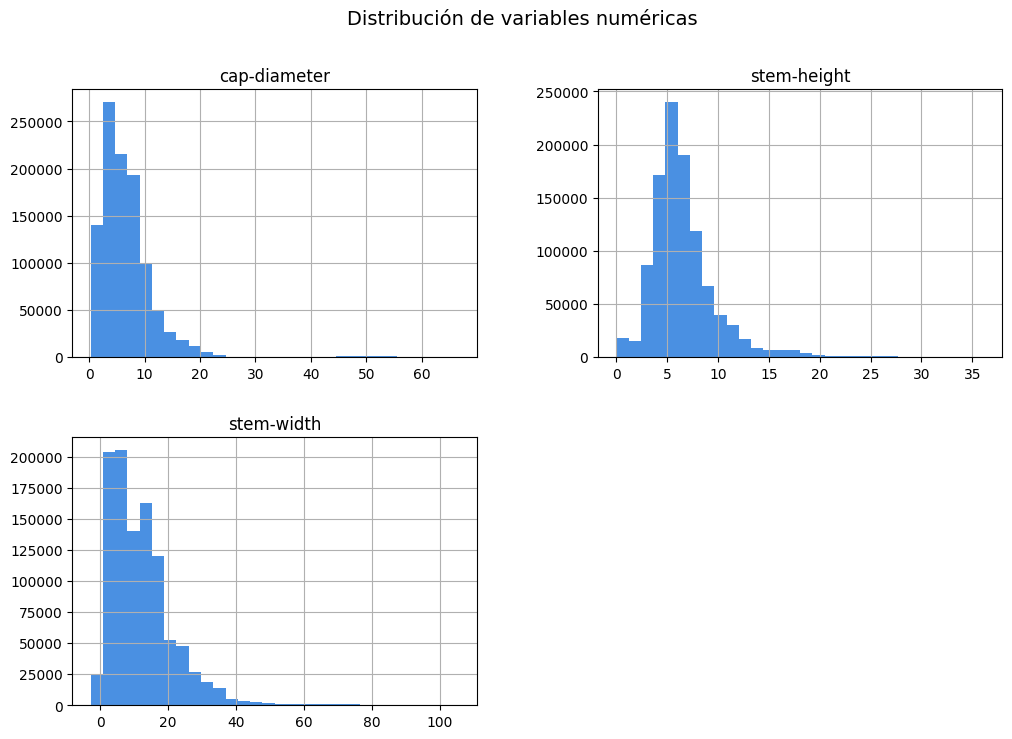

In [6]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(bins=30, figsize=(12,8), color='#4a90e2')
plt.suptitle('Distribuci√≥n de variables num√©ricas', fontsize=14)
plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color='#4a90e2')
    plt.title(f'Distribuci√≥n de {col}')
    plt.show()


Como pudimos observar, el an√°lisis num√©rico mostr√≥ que:

- Los valores de `cap-diameter`, `stem-height` y `stem-width` presentan una distribuci√≥n sesgada positivamente (*right-skewed distribution*). Evidencian a primera vista posibles outliers.

- Se detectaron valores at√≠picos potenciales, como `stem-width` negativo o `stem-height` igual a cero, lo que podr√≠a indicar errores de medici√≥n o registro.

### 1.3. Distribuci√≥n de variables categ√≥ricas

In [7]:
df.describe(include=['object'])

class cap-shape cap-surface cap-color does-bruise-or-bleed  \
count   1038000   1038000      798000   1038000              1038000   
unique        2         7          11        12                    2   
top           p         x           t         n                    f   
freq     576000    457326      138461    415920               858000   

       gill-attachment gill-spacing gill-color stem-root stem-surface  \
count           870000       612000    1038000    162000       390000   
unique               7            3         12         5            8   
top                  a            c          w         b            s   
freq            216055       420000     314585     54000       101929   

       stem-color veil-type veil-color has-ring ring-type spore-print-color  \
count     1038000     54000     126000  1038000    996000            108000   
unique         13         1          6        2         8                 7   
top             w         u          w        f         f                 k   
freq       389907     54000      92989   780000    822000             36003   

        habitat   season  
count   1038000  1038000  
unique        8        4  
top           d        a  
freq     751259   514753

C:\Users\ICOSTARE\AppData\Local\Temp\ipykernel_22280\1931292404.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='crest', ax=axes[i])
C:\Users\ICOSTARE\AppData\Local\Temp\ipykernel_22280\1931292404.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='crest', ax=axes[i])
C:\Users\ICOSTARE\AppData\Local\Temp\ipykernel_22280\1931292404.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].v

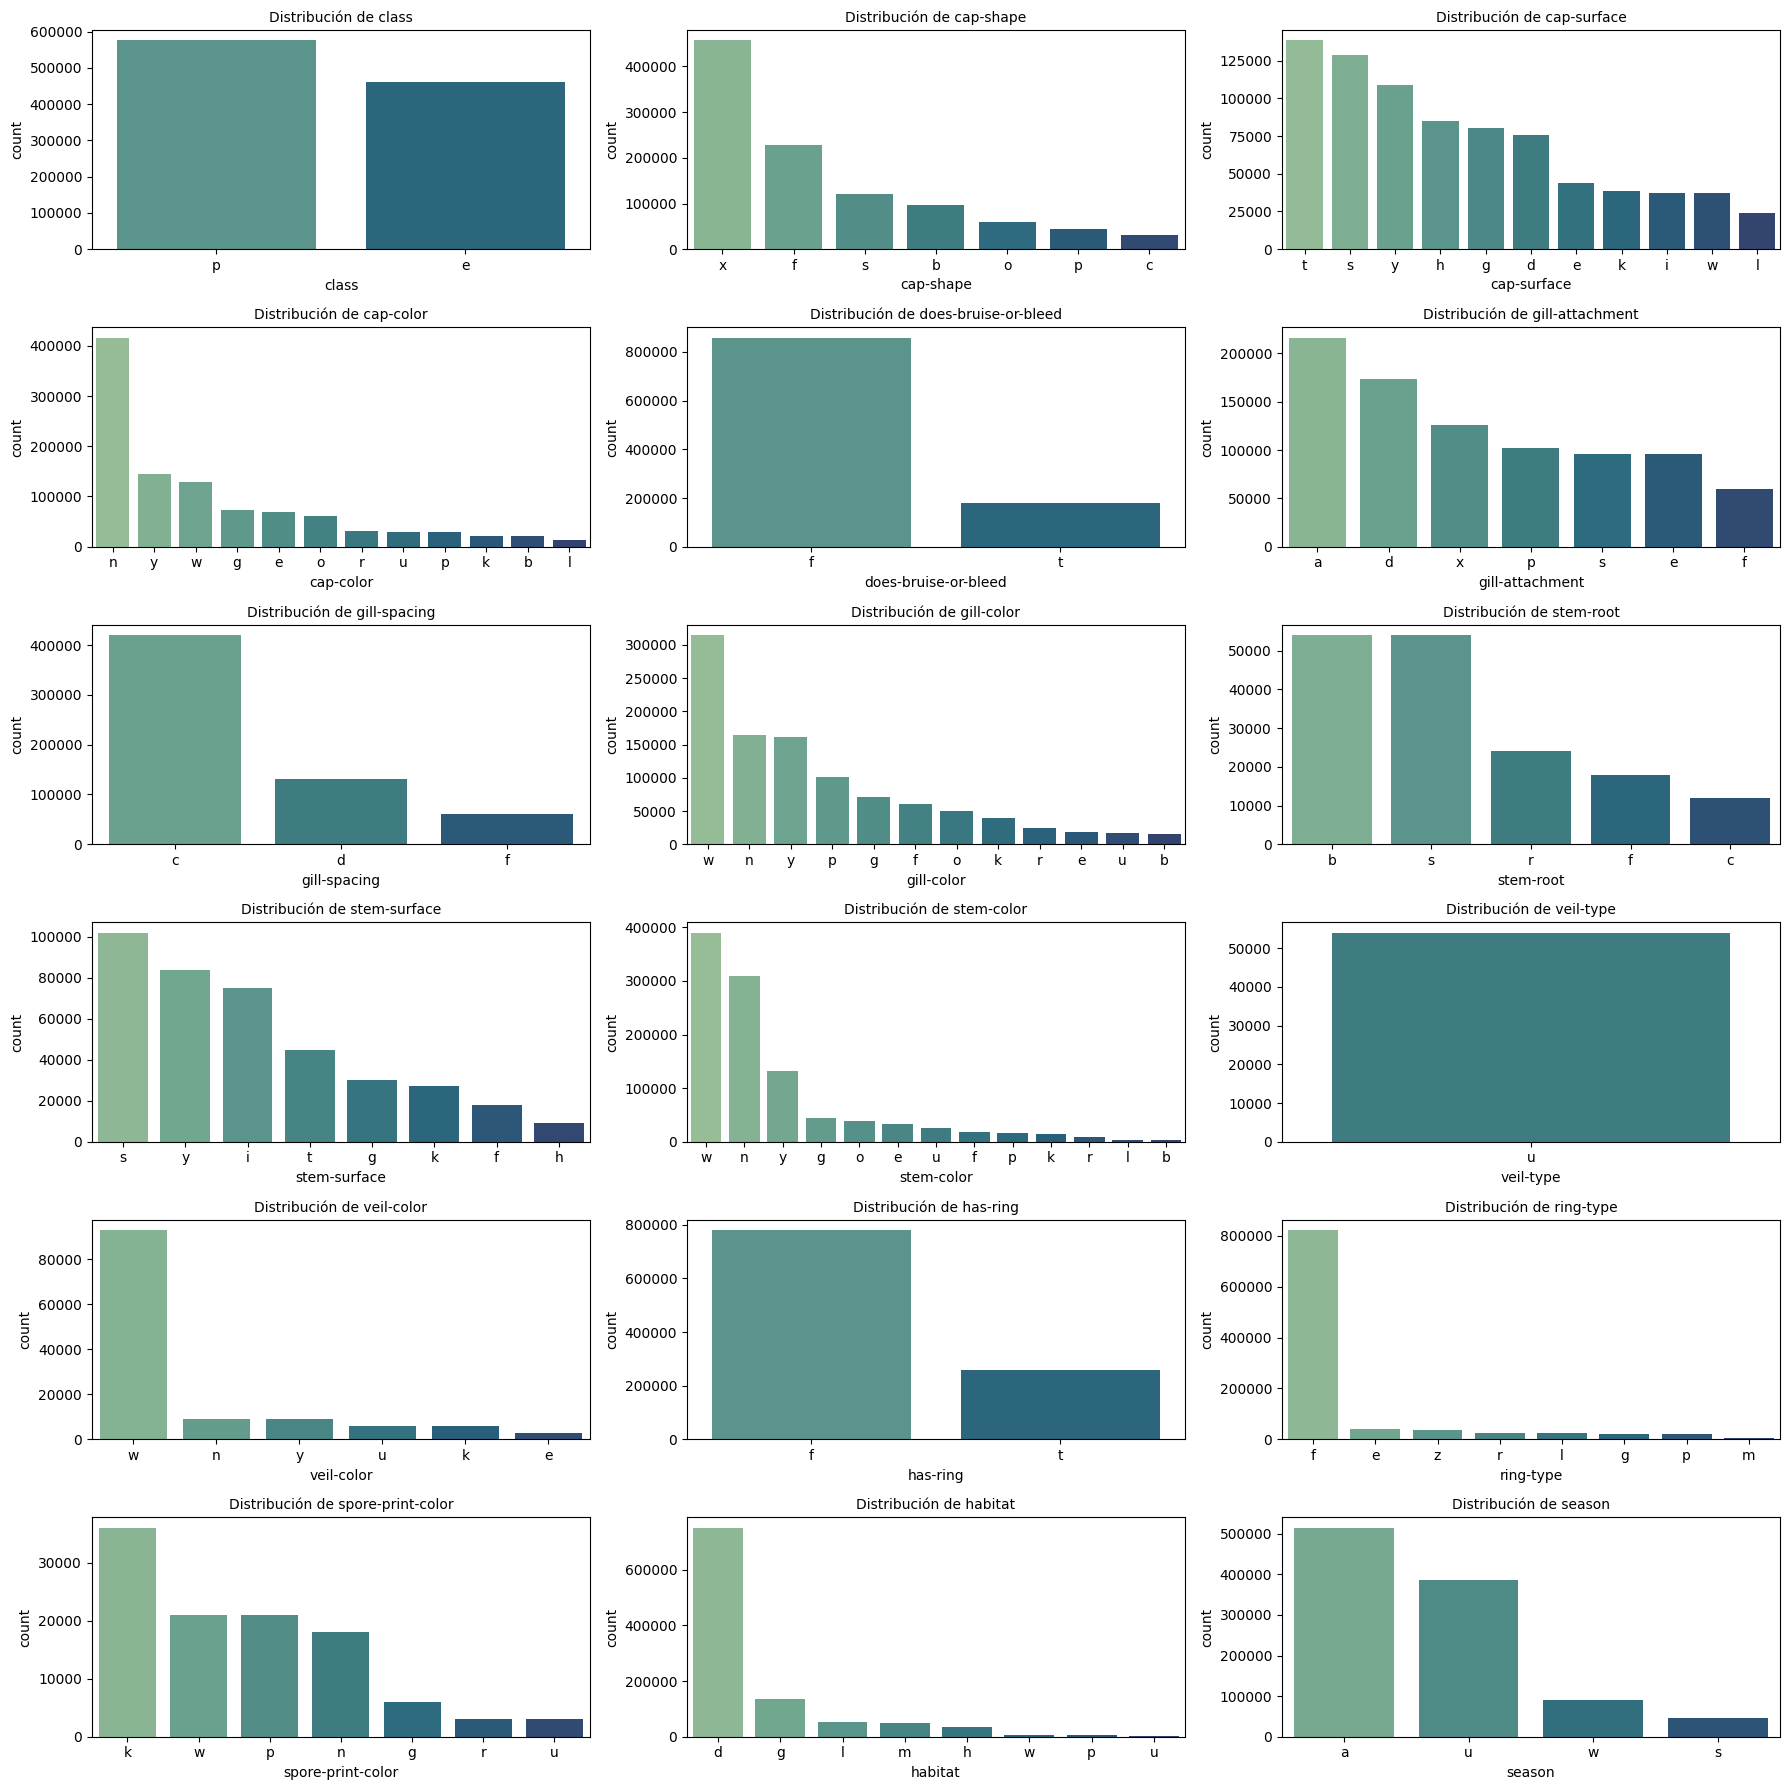

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(6, 3, figsize=(18, 18))
axes = axes.flatten() 


for i, col in enumerate(categorical_cols[:18]): 
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='crest', ax=axes[i])
    axes[i].set_title(f'Distribuci√≥n de {col}', fontsize=10)
    axes[i].tick_params(axis='x', rotation=0)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Las estad√≠sticas de las variables categ√≥ricas mostraron:
- Varios atributos con alta cardinalidad (por ejemplo, `cap-color` con 12 categor√≠as y `stem-color` con 13).

- La variable `veil-type` tiene una sola categor√≠a (‚Äúu‚Äù) y gran cantidad de faltantes, lo que indica que no aporta informaci√≥n, por lo tanto, podr√≠a eliminarse del an√°lisis.

- **La distribuci√≥n de la variable `class` (target) est√° levemente desbalanceada, con $57.6 \%$ de hongos venenosos y $42.4 \%$ comestibles, algo a tener en cuenta en la etapa de modelado.**

### 1.4. An√°lisis de valores faltantes y duplicados

In [9]:
# Busqueda de "?" como valores faltantes
(df == "?").any()

 # Reemplazo de "?"" por NaN (comentado por ahora porque no hay)
# df = df.replace('?', np.nan)

class                   False
cap-diameter            False
cap-shape               False
cap-surface             False
cap-color               False
does-bruise-or-bleed    False
gill-attachment         False
gill-spacing            False
gill-color              False
stem-height             False
stem-width              False
stem-root               False
stem-surface            False
stem-color              False
veil-type               False
veil-color              False
has-ring                False
ring-type               False
spore-print-color       False
habitat                 False
season                  False
dtype: bool

In [10]:
df.isnull().sum()

class                        0
cap-diameter                 0
cap-shape                    0
cap-surface             240000
cap-color                    0
does-bruise-or-bleed         0
gill-attachment         168000
gill-spacing            426000
gill-color                   0
stem-height                  0
stem-width                   0
stem-root               876000
stem-surface            648000
stem-color                   0
veil-type               984000
veil-color              912000
has-ring                     0
ring-type                42000
spore-print-color       930000
habitat                      0
season                       0
dtype: int64

<Axes: >

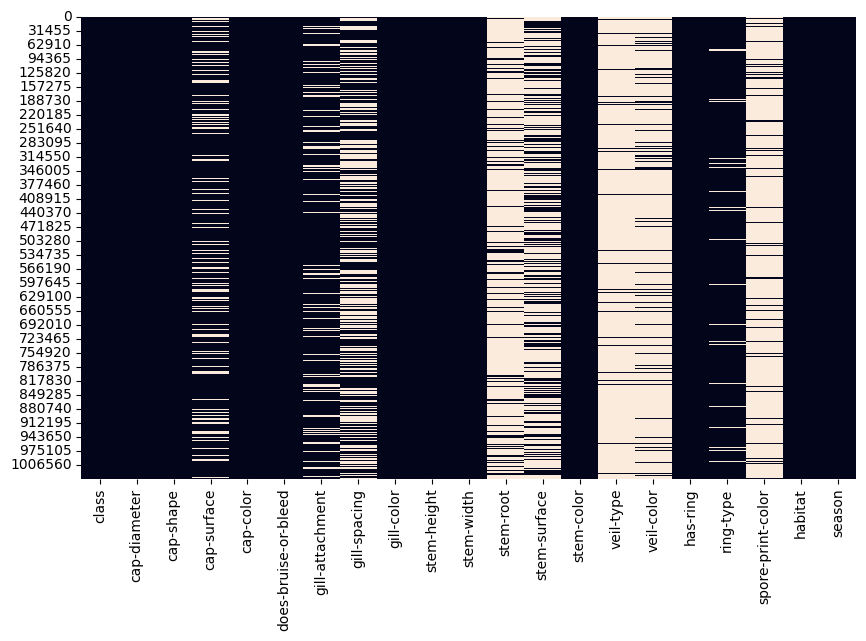

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)

                      Valores Faltantes  Porcentaje (%)
veil-type                        984000       94.797688
spore-print-color                930000       89.595376
veil-color                       912000       87.861272
stem-root                        876000       84.393064
stem-surface                     648000       62.427746
gill-spacing                     426000       41.040462
cap-surface                      240000       23.121387
gill-attachment                  168000       16.184971
ring-type                         42000        4.046243
cap-color                             0        0.000000
cap-shape                             0        0.000000
cap-diameter                          0        0.000000
class                                 0        0.000000
stem-height                           0        0.000000
stem-width                            0        0.000000
does-bruise-or-bleed                  0        0.000000
gill-color                            0        0

C:\Users\ICOSTARE\AppData\Local\Temp\ipykernel_22280\2272995886.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent[missing_percent > 0],


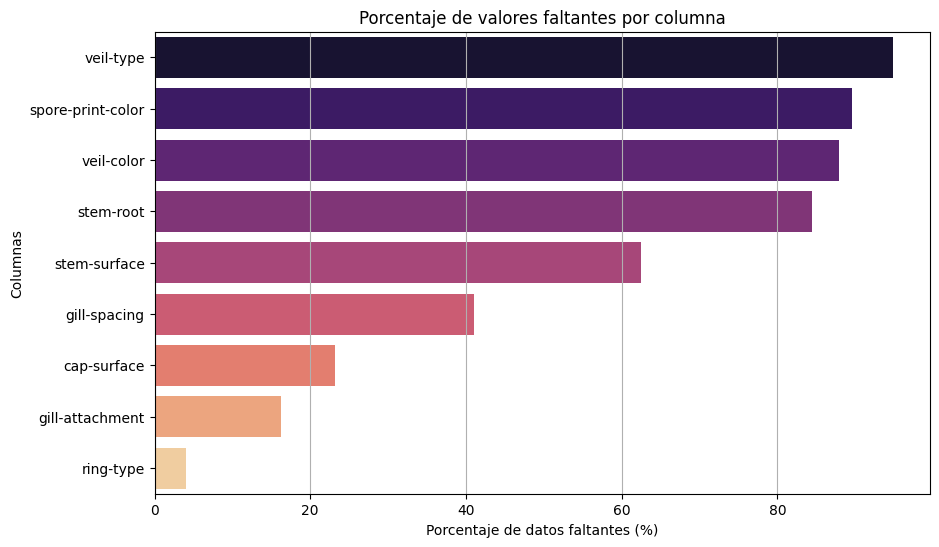

In [12]:
# Faltantes
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Valores Faltantes': missing, 'Porcentaje (%)': missing_percent})

print(missing_df)

# Duplicados
duplicates = df.duplicated().sum()
print("--------------------------------------------------------")
print(f"N√∫mero de filas duplicadas: {duplicates:,}")
print(f"Porcentaje de duplicados: {(duplicates / len(df)) * 100:.2f}%")

plt.figure(figsize=(10,6))
sns.barplot(x=missing_percent[missing_percent > 0], 
            y=missing_percent[missing_percent > 0].index, 
            palette='magma')
plt.title('Porcentaje de valores faltantes por columna')
plt.xlabel('Porcentaje de datos faltantes (%)')
plt.ylabel('Columnas')
plt.grid(axis='x')
plt.show()

Al examinar la cantidad y el porcentaje de valores faltantes por columna, se observ√≥ que el dataset presenta niveles significativos de ausencia de datos en varias variables. En particular:

- `veil_type` tiene un $94.8 \%$ de valores faltantes.

- `spore_print_color`, `veil_color` y `stem_root` tambi√©n presentan m√°s del $80 \%$ de datos ausentes.

- Otras variables como `stem_surface` ($62.4 \%$), `gill_spacing` ($41 \%$) y `cap_surface` ($23 \%$) muestran una cantidad intermedia de faltantes, mientras que el resto posee datos completos.

Estas proporciones indican que ciertas columnas aportan muy poca informaci√≥n √∫til o su imputaci√≥n podr√≠a introducir un sesgo considerable. En particular, *veil_type*, con casi todos los valores nulos, probablemente deba ser eliminada del conjunto de datos, ya que no ofrece variabilidad ni informaci√≥n relevante. Para los casos intermedios, como cap-surface o gill-spacing, podr√≠amos evaluar la imputaci√≥n mediante otro par√°metro como la moda o la media.
Por lo expresado anteriormente, conclu√≠mos que el dataset requiere un proceso de limpieza, priorizando la eliminaci√≥n o imputaci√≥n de variables con altos porcentajes de faltantes antes de continuar con la etapa de preprocesamiento. 

### 1.5. Identificaci√≥n de outliers y posibles inconsistencias
Para este an√°lisis se utiliz√≥ el m√©todo del rango intercuart√≠lico (IQR). La elecci√≥n de este m√©todo la justificamos en lo siguiente:
- No depende de la distribuci√≥n (no asume normalidad). Esto es importante ya que, como se puede observar en los gr√°ficos de *2. Distribuci√≥n de variables num√©ricas*, dichas variables justamente no siguen una distribuci√≥n normal.
- Es robusto frente a valores extremos. Los cuartiles no se ven afectados significativamente por pocos valores at√≠picos.

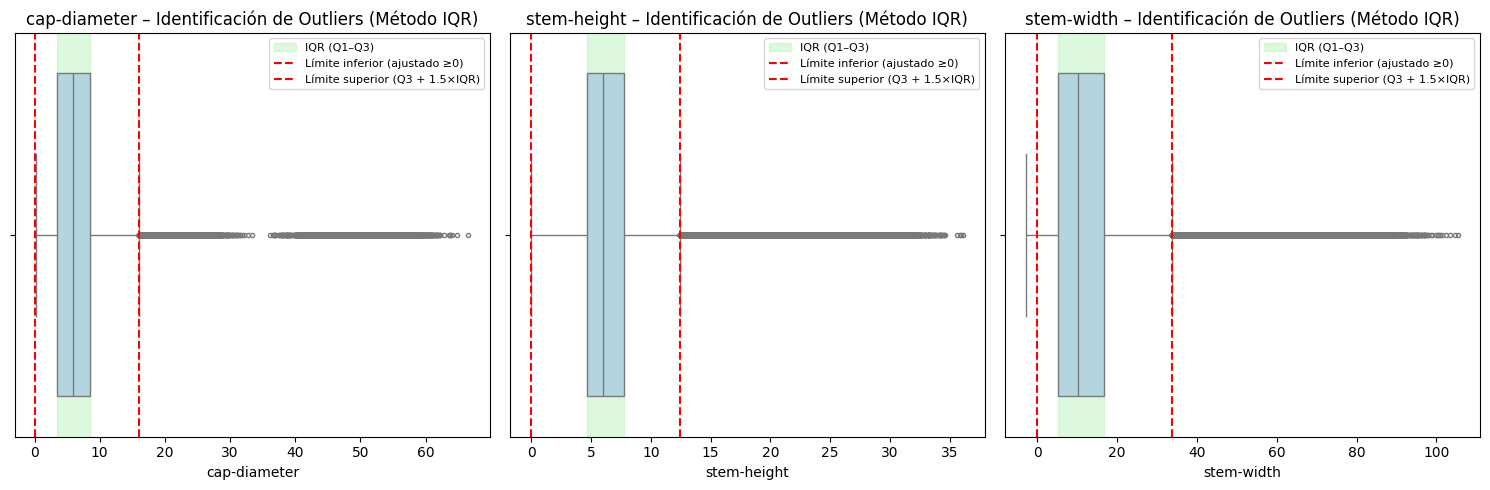

In [13]:
variables = ['cap-diameter', 'stem-height', 'stem-width']

plt.figure(figsize=(15, 5))

for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = max(Q1 - 1.5 * IQR, 0)  # el l√≠mite inferior lo recortamos en 0 para evidenciar valores at√≠picos
    upper_limit = Q3 + 1.5 * IQR

    sns.boxplot(x=df[var], color="lightblue", fliersize=3)
    
    plt.axvspan(Q1, Q3, color="lightgreen", alpha=0.3, label="IQR (Q1‚ÄìQ3)")
    
    plt.axvline(lower_limit, color="red", linestyle="--", label="L√≠mite inferior (ajustado ‚â•0)")
    plt.axvline(upper_limit, color="red", linestyle="--", label="L√≠mite superior (Q3 + 1.5√óIQR)")

    plt.title(f"{var} ‚Äì Identificaci√≥n de Outliers (M√©todo IQR)")
    plt.xlabel(var)
    plt.legend(loc="upper right", fontsize=8)

plt.tight_layout()
plt.show()


**Los resultados indicaron que los outliers representan menos del $3 \%$ del total de observaciones, por lo que se consider√≥ un nivel aceptable para continuar con el an√°lisis sin comprometer la representatividad de los datos.**

### 1.6. An√°lisis de correlaciones entre variables

Para este an√°lisis exploratorio, se busc√≥ evaluar la fuerza de relaci√≥n entre cada variable del dataset y la variable objetivo `class`, la cual indica si el hongo es o no comestible.
Dado que el dataset contiene tanto variables num√©ricas como categ√≥ricas, no pudimos usar un √∫nico m√©todo de correlaci√≥n para todo el conjunto (cada tipo de variable requiere un tratamiento distinto). Por esta razon decidimos utilizar:
- **Cram√©r's V**: basada en el estad√≠stico Chi-cuadrado, √∫til para estimar la asociaci√≥n *entre variables categ√≥ricas*. En este caso, se us√≥ para ver qu√© variables categ√≥ricas est√°n m√°s relacionadas con la clase objetivo ('class').

- **Œ∑ ‚Äî Correlation Ratio**: La correlaci√≥n Œ∑ (eta) mide la asociaci√≥n *entre una variable num√©rica y una variable categ√≥rica* y permite capturar relaciones no lineales. La usamos para medir c√≥mo se relacionan las variables num√©ricas con la clase objetivo.

In [14]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    denom = min((kcorr - 1), (rcorr - 1))
    if denom <= 0:
        return np.nan
    return np.sqrt(phi2corr / denom)

def correlation_ratio(categories, values):
    categories = pd.Categorical(categories)
    cat_means = values.groupby(categories, observed=False).mean()
    n = values.groupby(categories, observed=False).count()
    overall_mean = values.mean()
    numerator = np.sum(n * (cat_means - overall_mean)**2)
    denominator = np.sum((values - overall_mean)**2)
    return np.sqrt(numerator / denominator) if denominator != 0 else 0

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns.drop('class')

# Correlaciones categ√≥ricas con class (Cram√©r‚Äôs V)
cramers_results = {}
for col in cat_cols:
    confusion_mat = pd.crosstab(df[col], df['class'])
    cramers_results[col] = cramers_v(confusion_mat)
cramers_series = pd.Series(cramers_results, name='CramersV')

# Correlaci√≥n num√©rica con class (Œ∑)
eta_results = {}
for col in num_cols:
    eta_results[col] = correlation_ratio(df['class'], df[col])
eta_series = pd.Series(eta_results, name='Eta')

correlations_target = pd.concat([cramers_series, eta_series]).sort_values(ascending=False)
plt.figure(figsize=(8, 10))
sns.heatmap(correlations_target.to_frame(), annot=True, cmap="YlGnBu", cbar=False)
plt.title("Relaci√≥n de cada variable con la clase (Cram√©r‚Äôs V y Œ∑)")
plt.ylabel("Variables")
plt.xlabel("Fuerza de relaci√≥n")
plt.show()


Como se puede observar en gr√°fico precedente, las variables m√°s influyentes para predecir la clase de hongo son principalmente morfol√≥gicas y de coloraci√≥n: *spore-print-color, stem-root, veil-color y stem-surface* presentan las correlaciones m√°s altas. Otras como *stem-color, cap-surface y gill-attachment* aportan informaci√≥n complementaria, mientras que variables como *has-ring y does-bruise-or-bleed* muestran escasa relevancia. Estos resultados fueron tenidos en cuenta para la selecci√≥n de variables para el modelado, priorizando las m√°s relevantes para optimizar la eficiencia del modelo.

Para este an√°lisis exploratorio, se busc√≥ evaluar la fuerza de relaci√≥n entre cada variable del dataset y la variable objetivo *class*, la cual indica si el hongo es o no comestible.
Dado que el dataset contiene tanto variables num√©ricas como categ√≥ricas, no pudimos usar un √∫nico m√©todo de correlaci√≥n para todo el conjunto (cada tipo de variable requiere un tratamiento distinto). Por esta razon decidimos utilizar:
- **Cram√©r's V**: basada en el estad√≠stico Chi-cuadrado, √∫til para estimar la asociaci√≥n *entre variables categ√≥ricas*. En este caso, se us√≥ para ver qu√© variables categ√≥ricas est√°n m√°s relacionadas con la clase objetivo ('class').

- **Œ∑ ‚Äî Correlation Ratio**: La correlaci√≥n Œ∑ (eta) mide la asociaci√≥n *entre una variable num√©rica y una variable categ√≥rica* y permite capturar relaciones no lineales. La usamos para medir c√≥mo se relacionan las variables num√©ricas con la clase objetivo.

## Resumen EDA

- Registros y columnas: $1.038.000$ filas y $21$ columnas (18 categ√≥ricas, 3 num√©ricas).

- Variable objetivo: `class` (hongos comestibles o venenosos, clasificaci√≥n binaria).

- Variables num√©ricas: Distribuciones sesgadas con cola a la derecha; outliers $<3 \%$.

- Variables categ√≥ricas: Alta cardinalidad en varias columnas; `veil-type` poco informativa.

- Valores faltantes: Significativos en varias columnas. Requerir√°n limpieza o imputaci√≥n.

- Correlaci√≥n con la clase objetivo: M√°s relevantes: `spore-print-color`, `stem-root`, `veil-color`, `stem-surface`.

- Baja relevancia: `has-ring` y `does-bruise-or-bleed`.

# 2. Preprocesamiento y Modelado

## 2.1. Split inicial de datos

En esta etapa, dividimos el dataset en conjuntos de **entrenamiento (train)** y **prueba (test)** antes de realizar cualquier preprocesamiento. Esta divisi√≥n temprana es fundamental para evitar *data leakage* (filtraci√≥n de informaci√≥n del conjunto de prueba hacia el entrenamiento).

Se utilizar√° una proporci√≥n de **80/20** (80% para entrenamiento y 20% para prueba), con `stratify=y` para mantener la proporci√≥n de clases balanceada en ambos conjuntos, dado que observamos un leve desbalance en la variable objetivo ($57.6 \%$ venenosos vs $42.4 \%$ comestibles).

Adicionalmente, se fijar√° `random_state=42` para garantizar la reproducibilidad de los resultados.

In [16]:
from sklearn.model_selection import train_test_split

# Separamos features (X) y target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split inicial 80/20 con estratificaci√≥n
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Tama√±o del conjunto original: {len(df):,}")
print(f"Tama√±o del conjunto de entrenamiento: {len(X_train):,} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Tama√±o del conjunto de prueba: {len(X_test):,} ({len(X_test)/len(df)*100:.1f}%)")
print(f"\nDistribuci√≥n de clases en el conjunto original:")
print(y.value_counts(normalize=True))
print(f"\nDistribuci√≥n de clases en entrenamiento:")
print(y_train.value_counts(normalize=True))
print(f"\nDistribuci√≥n de clases en prueba:")
print(y_test.value_counts(normalize=True))

Tama√±o del conjunto original: 1,038,000
Tama√±o del conjunto de entrenamiento: 830,400 (80.0%)
Tama√±o del conjunto de prueba: 207,600 (20.0%)

Distribuci√≥n de clases en el conjunto original:
class
p    0.554913
e    0.445087
Name: proportion, dtype: float64

Distribuci√≥n de clases en entrenamiento:
class
p    0.554913
e    0.445087
Name: proportion, dtype: float64

Distribuci√≥n de clases en prueba:
class
p    0.554913
e    0.445087
Name: proportion, dtype: float64


## 2.2. Definici√≥n de m√©tricas de evaluaci√≥n

Antes de entrenar los modelos, es fundamental definir las m√©tricas que utilizaremos para evaluar su rendimiento. Dado que estamos trabajando con un problema de **clasificaci√≥n binaria** (hongos comestibles vs venenosos), y considerando que el dataset presenta un leve desbalance de clases (57.6% venenosos vs 42.4% comestibles), evaluaremos los modelos utilizando m√∫ltiples m√©tricas complementarias.

### 2.2.1. M√©tricas principales

Para este problema de clasificaci√≥n, utilizaremos las siguientes m√©tricas:

#### **1. Accuracy (Exactitud)**
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

Representa la proporci√≥n de predicciones correctas sobre el total. Es √∫til como m√©trica general, pero puede ser enga√±osa en datasets desbalanceados.

#### **2. Precision (Precisi√≥n)**
$$\text{Precision} = \frac{TP}{TP + FP}$$

Mide qu√© proporci√≥n de los hongos clasificados como venenosos realmente lo son. **Alta precisi√≥n = pocos falsos positivos**.

#### **3. Recall (Sensibilidad o Tasa de Verdaderos Positivos)**
$$\text{Recall} = \frac{TP}{TP + FN}$$

Mide qu√© proporci√≥n de hongos venenosos fueron correctamente identificados. **Alto recall = pocos falsos negativos**.

#### **4. F1-Score**
$$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

Media arm√≥nica entre precisi√≥n y recall. Equilibra ambas m√©tricas y es especialmente √∫til en datasets desbalanceados.

#### **5. ROC-AUC (Area Under the ROC Curve)**

Mide la capacidad del modelo para distinguir entre clases. Un AUC de 1.0 indica clasificaci√≥n perfecta, mientras que 0.5 indica clasificaci√≥n aleatoria.

#### **6. Matriz de Confusi√≥n**

Visualizaci√≥n de TP, TN, FP y FN que permite analizar los tipos de errores cometidos por el modelo.

### 2.2.2. Contexto del problema y consecuencias de los errores

En el contexto de clasificaci√≥n de hongos, los dos tipos de errores tienen implicaciones muy diferentes:

| Tipo de Error | Descripci√≥n | Consecuencia |
|--------------|-------------|--------------|
| **Falso Positivo (FP)** | Clasificar un hongo comestible como venenoso | P√©rdida de alimento comestible (consecuencia menor) |
| **Falso Negativo (FN)** | Clasificar un hongo venenoso como comestible | **Riesgo de intoxicaci√≥n o muerte (consecuencia cr√≠tica)** |

**‚ö†Ô∏è Implicaci√≥n importante**: Los **falsos negativos son mucho m√°s graves** que los falsos positivos. Por lo tanto, priorizaremos modelos con **alto Recall** (baja tasa de falsos negativos) para asegurar que la mayor√≠a de los hongos venenosos sean correctamente identificados, aunque esto pueda implicar clasificar algunos hongos comestibles como venenosos por precauci√≥n.

### 2.2.3. Funci√≥n de evaluaci√≥n unificada

Para facilitar la comparaci√≥n entre modelos, crearemos una funci√≥n que calcule todas las m√©tricas de forma consistente y genere visualizaciones √∫tiles.

In [17]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)

def evaluate_model(y_true, y_pred, y_pred_proba=None, model_name="Model"):
    """
    Eval√∫a un modelo de clasificaci√≥n binaria con m√∫ltiples m√©tricas.
    
    Parameters:
    -----------
    y_true : array-like
        Valores verdaderos
    y_pred : array-like
        Predicciones del modelo (clases)
    y_pred_proba : array-like, optional
        Probabilidades predichas (para ROC-AUC)
    model_name : str
        Nombre del modelo para el reporte
        
    Returns:
    --------
    dict : Diccionario con todas las m√©tricas
    """
    
    # Calcular m√©tricas
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }
    
    # ROC-AUC si hay probabilidades disponibles
    if y_pred_proba is not None:
        metrics['ROC-AUC'] = roc_auc_score(y_true, y_pred_proba)
    
    # Imprimir reporte
    print(f"\n{'='*60}")
    print(f"EVALUACI√ìN DEL MODELO: {model_name}")
    print(f"{'='*60}")
    for metric, value in metrics.items():
        if metric != 'Model':
            print(f"{metric:15s}: {value:.4f}")
    
    # Matriz de confusi√≥n
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nMatriz de Confusi√≥n:")
    print(cm)
    
    # Reporte de clasificaci√≥n
    print(f"\nReporte de Clasificaci√≥n:")
    print(classification_report(y_true, y_pred, target_names=['Comestible (0)', 'Venenoso (1)']))
    
    return metrics

def plot_confusion_matrix(y_true, y_pred, model_name="Model"):
    """
    Visualiza la matriz de confusi√≥n
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Comestible (0)', 'Venenoso (1)'],
                yticklabels=['Comestible (0)', 'Venenoso (1)'])
    plt.title(f'Matriz de Confusi√≥n - {model_name}')
    plt.ylabel('Valor Real')
    plt.xlabel('Predicci√≥n')
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, model_name="Model"):
    """
    Visualiza la curva ROC
    """
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

print("‚úì Funciones de evaluaci√≥n definidas correctamente")

‚úì Funciones de evaluaci√≥n definidas correctamente


### 2.2.4. Criterios de selecci√≥n del mejor modelo

Para seleccionar el mejor modelo, consideraremos los siguientes criterios en orden de prioridad:

1. **Recall (Sensibilidad)** ‚ö†Ô∏è **[PRIORIDAD M√ÅXIMA]**
   - Debe ser **lo m√°s alto posible** (idealmente >95%)
   - Minimiza el riesgo de falsos negativos (hongos venenosos clasificados como comestibles)

2. **F1-Score**
   - Equilibra Precision y Recall
   - √ötil para comparar modelos con recall similar

3. **ROC-AUC**
   - Eval√∫a la capacidad general de discriminaci√≥n del modelo

4. **Accuracy**
   - M√©trica general de referencia, pero menos prioritaria dado el desbalance de clases

5. **Precision**
   - Importante pero secundaria al Recall en este contexto
   - Un modelo con alto Recall pero baja Precision es preferible a uno con alta Precision pero bajo Recall

**Nota**: En un escenario real de producci√≥n, ser√≠a aceptable tener algunos falsos positivos (rechazar hongos comestibles) si esto garantiza una detecci√≥n cercana al 100% de los hongos venenosos.

## 2.3. Preprocesamiento de datos

El preprocesamiento es fundamental para garantizar que los datos est√©n en el formato adecuado para los diferentes modelos que vamos a entrenar. Bas√°ndonos en el an√°lisis exploratorio, implementaremos las siguientes transformaciones:

1. **Eliminaci√≥n de columnas poco informativas**: Columnas con >90% de valores faltantes o sin variabilidad
2. **Tratamiento de valores faltantes**: Imputaci√≥n seg√∫n el tipo de variable y porcentaje de faltantes
3. **Encoding de variables categ√≥ricas**: Transformaci√≥n a formato num√©rico
4. **Estandarizaci√≥n de variables num√©ricas**: Normalizaci√≥n para modelos sensibles a la escala

**Importante**: Todas las transformaciones se ajustar√°n **solo con el conjunto de entrenamiento** para evitar data leakage.

### 2.3.1. An√°lisis de valores faltantes en train y test

In [18]:
# Verificamos los valores faltantes en ambos conjuntos
print("=" * 60)
print("VALORES FALTANTES EN CONJUNTO DE ENTRENAMIENTO")
print("=" * 60)
missing_train = X_train.isnull().sum().sort_values(ascending=False)
missing_train_pct = (missing_train / len(X_train)) * 100
missing_train_df = pd.DataFrame({
    'Count': missing_train,
    'Percentage (%)': missing_train_pct
})
print(missing_train_df[missing_train_df['Count'] > 0])

print("\n" + "=" * 60)
print("VALORES FALTANTES EN CONJUNTO DE PRUEBA")
print("=" * 60)
missing_test = X_test.isnull().sum().sort_values(ascending=False)
missing_test_pct = (missing_test / len(X_test)) * 100
missing_test_df = pd.DataFrame({
    'Count': missing_test,
    'Percentage (%)': missing_test_pct
})
print(missing_test_df[missing_test_df['Count'] > 0])

VALORES FALTANTES EN CONJUNTO DE ENTRENAMIENTO
                    Count  Percentage (%)
veil-type          787357       94.816594
spore-print-color  743961       89.590679
veil-color         729816       87.887283
stem-root          701037       84.421604
stem-surface       518203       62.404022
gill-spacing       340660       41.023603
cap-surface        192285       23.155708
gill-attachment    134516       16.198940
ring-type           33679        4.055756

VALORES FALTANTES EN CONJUNTO DE PRUEBA
                    Count  Percentage (%)
veil-type          196643       94.722062
spore-print-color  186039       89.614162
veil-color         182184       87.757225
stem-root          174963       84.278902
stem-surface       129797       62.522640
gill-spacing        85340       41.107900
cap-surface         47715       22.984104
gill-attachment     33484       16.129094
ring-type            8321        4.008189
                    Count  Percentage (%)
veil-type          787357     

### 2.3.2. Estrategia de preprocesamiento

Bas√°ndonos en el an√°lisis de valores faltantes y en las caracter√≠sticas del dataset, definimos la siguiente estrategia:

**1. Columnas a eliminar (>90% faltantes o sin variabilidad):**
- `veil-type`: 94.8% de valores faltantes y una sola categor√≠a

**2. Imputaci√≥n de valores faltantes:**
- **Variables categ√≥ricas**: Imputar con la moda (valor m√°s frecuente) o crear categor√≠a "missing"
- **Variables num√©ricas**: Imputar con la mediana (robusta ante outliers)

**3. Encoding de variables categ√≥ricas:**
- **One-Hot Encoding**: Para modelos que no manejan variables categ√≥ricas (Regresi√≥n Log√≠stica, Naive Bayes)
- **Label Encoding**: Alternativa para √°rboles (Decision Tree, Random Forest, Gradient Boosting pueden manejar ambos)

**4. Estandarizaci√≥n:**
- **StandardScaler**: Para Regresi√≥n Log√≠stica y Naive Bayes (sensibles a la escala)
- **Sin estandarizar**: Para modelos basados en √°rboles (no sensibles a la escala)

### 2.3.3. Implementaci√≥n del Pipeline de Preprocesamiento

Utilizaremos `Pipeline` y `ColumnTransformer` de scikit-learn para crear pipelines reutilizables y evitar data leakage. Crearemos dos versiones:

1. **Pipeline con One-Hot Encoding**: Para Regresi√≥n Log√≠stica y Naive Bayes
2. **Pipeline con Label Encoding**: Para modelos basados en √°rboles

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

# Hacer copias de los conjuntos de datos
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# 1. Eliminar columnas con >90% de valores faltantes
columns_to_drop = ['veil-type']
X_train_clean = X_train_copy.drop(columns=columns_to_drop)
X_test_clean = X_test_copy.drop(columns=columns_to_drop)

# 2. Identificar columnas num√©ricas y categ√≥ricas
numeric_features = X_train_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train_clean.select_dtypes(include=['object']).columns.tolist()

print(f"Columnas eliminadas: {columns_to_drop}")
print(f"\nColumnas num√©ricas ({len(numeric_features)}): {numeric_features}")
print(f"\nColumnas categ√≥ricas ({len(categorical_features)}): {categorical_features}")

Columnas eliminadas: ['veil-type']

Columnas num√©ricas (3): ['cap-diameter', 'stem-height', 'stem-width']

Columnas categ√≥ricas (16): ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']


In [20]:
# Pipeline 1: Con One-Hot Encoding (para Regresi√≥n Log√≠stica y Naive Bayes)
# Este pipeline incluye estandarizaci√≥n

# Transformador para variables num√©ricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Transformador para variables categ√≥ricas
categorical_transformer_onehot = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combinar transformadores
preprocessor_onehot = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer_onehot, categorical_features)
    ])

print("‚úì Pipeline con One-Hot Encoding creado (para Regresi√≥n Log√≠stica y Naive Bayes)")
print("  - Variables num√©ricas: Imputaci√≥n (mediana) + Estandarizaci√≥n")
print("  - Variables categ√≥ricas: Imputaci√≥n (moda) + One-Hot Encoding")

‚úì Pipeline con One-Hot Encoding creado (para Regresi√≥n Log√≠stica y Naive Bayes)
  - Variables num√©ricas: Imputaci√≥n (mediana) + Estandarizaci√≥n
  - Variables categ√≥ricas: Imputaci√≥n (moda) + One-Hot Encoding


In [21]:
# Pipeline 2: Sin estandarizaci√≥n (para modelos basados en √°rboles)
# Los modelos de √°rboles no requieren estandarizaci√≥n y manejan bien variables categ√≥ricas codificadas

from sklearn.preprocessing import OrdinalEncoder

# Transformador para variables num√©ricas (solo imputaci√≥n, sin escalado)
numeric_transformer_tree = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Transformador para variables categ√≥ricas (con Ordinal Encoding)
categorical_transformer_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combinar transformadores
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_tree, numeric_features),
        ('cat', categorical_transformer_ordinal, categorical_features)
    ])

print("‚úì Pipeline para modelos basados en √°rboles creado")
print("  - Variables num√©ricas: Imputaci√≥n (mediana) sin estandarizaci√≥n")
print("  - Variables categ√≥ricas: Imputaci√≥n (moda) + Ordinal Encoding")

‚úì Pipeline para modelos basados en √°rboles creado
  - Variables num√©ricas: Imputaci√≥n (mediana) sin estandarizaci√≥n
  - Variables categ√≥ricas: Imputaci√≥n (moda) + Ordinal Encoding


### 2.3.4. Aplicaci√≥n de las transformaciones

Ahora aplicamos los pipelines a los conjuntos de entrenamiento y prueba. Es importante recordar que:
- **fit_transform()** en train: Aprende los par√°metros (media, moda, categor√≠as, etc.) y transforma
- **transform()** en test: Solo transforma usando los par√°metros aprendidos del train

In [22]:
# Aplicar Pipeline 1 (One-Hot Encoding) - Para Regresi√≥n Log√≠stica y Naive Bayes
print("Aplicando transformaciones con One-Hot Encoding...")
X_train_onehot = preprocessor_onehot.fit_transform(X_train_clean)
X_test_onehot = preprocessor_onehot.transform(X_test_clean)

print(f"‚úì Datos transformados con One-Hot Encoding:")
print(f"  - X_train shape: {X_train_onehot.shape}")
print(f"  - X_test shape: {X_test_onehot.shape}")

# Aplicar Pipeline 2 (Ordinal Encoding) - Para modelos basados en √°rboles
print("\nAplicando transformaciones para modelos de √°rboles...")
X_train_tree = preprocessor_tree.fit_transform(X_train_clean)
X_test_tree = preprocessor_tree.transform(X_test_clean)

print(f"‚úì Datos transformados para modelos de √°rboles:")
print(f"  - X_train shape: {X_train_tree.shape}")
print(f"  - X_test shape: {X_test_tree.shape}")

print(f"\n{'='*60}")
print("RESUMEN DEL PREPROCESAMIENTO")
print(f"{'='*60}")
print(f"Dataset original: {X_train.shape[1]} columnas")
print(f"Despu√©s de eliminar columnas: {X_train_clean.shape[1]} columnas")
print(f"Despu√©s de One-Hot Encoding: {X_train_onehot.shape[1]} features")
print(f"Despu√©s de Ordinal Encoding: {X_train_tree.shape[1]} features")

Aplicando transformaciones con One-Hot Encoding...
‚úì Datos transformados con One-Hot Encoding:
  - X_train shape: (830400, 118)
  - X_test shape: (207600, 118)

Aplicando transformaciones para modelos de √°rboles...
‚úì Datos transformados con One-Hot Encoding:
  - X_train shape: (830400, 118)
  - X_test shape: (207600, 118)

Aplicando transformaciones para modelos de √°rboles...
‚úì Datos transformados para modelos de √°rboles:
  - X_train shape: (830400, 19)
  - X_test shape: (207600, 19)

RESUMEN DEL PREPROCESAMIENTO
Dataset original: 20 columnas
Despu√©s de eliminar columnas: 19 columnas
Despu√©s de One-Hot Encoding: 118 features
Despu√©s de Ordinal Encoding: 19 features
‚úì Datos transformados para modelos de √°rboles:
  - X_train shape: (830400, 19)
  - X_test shape: (207600, 19)

RESUMEN DEL PREPROCESAMIENTO
Dataset original: 20 columnas
Despu√©s de eliminar columnas: 19 columnas
Despu√©s de One-Hot Encoding: 118 features
Despu√©s de Ordinal Encoding: 19 features


### 2.3.5. Preparaci√≥n de la variable objetivo

Para algunos modelos (especialmente Naive Bayes y Regresi√≥n Log√≠stica en scikit-learn), es recomendable codificar la variable objetivo como valores num√©ricos.

In [23]:
# Codificar la variable objetivo
# e (edible/comestible) = 0
# p (poisonous/venenoso) = 1

label_encoder_y = LabelEncoder()
y_train_encoded = label_encoder_y.fit_transform(y_train)
y_test_encoded = label_encoder_y.transform(y_test)

print("Codificaci√≥n de la variable objetivo:")
print(f"  - Clases originales: {label_encoder_y.classes_}")
print(f"  - Mapeo: {dict(zip(label_encoder_y.classes_, label_encoder_y.transform(label_encoder_y.classes_)))}")
print(f"\nDistribuci√≥n en train (codificado):")
print(pd.Series(y_train_encoded).value_counts().sort_index())
print(f"\nDistribuci√≥n en test (codificado):")
print(pd.Series(y_test_encoded).value_counts().sort_index())

Codificaci√≥n de la variable objetivo:
  - Clases originales: ['e' 'p']
  - Mapeo: {'e': np.int64(0), 'p': np.int64(1)}

Distribuci√≥n en train (codificado):
0    369600
1    460800
Name: count, dtype: int64

Distribuci√≥n en test (codificado):
0     92400
1    115200
Name: count, dtype: int64


## Resumen del Preprocesamiento

**Datasets preparados:**

1. **Pipeline con One-Hot Encoding + Estandarizaci√≥n:**
   - Variables: `X_train_onehot`, `X_test_onehot`
   - Target: `y_train_encoded`, `y_test_encoded`
   - **Para:** Logistic Regression, Naive Bayes
   - **Raz√≥n:** Estos modelos son sensibles a la escala y requieren variables num√©ricas

2. **Pipeline con Ordinal Encoding (sin estandarizar):**
   - Variables: `X_train_tree`, `X_test_tree`
   - Target: `y_train_encoded`, `y_test_encoded`
   - **Para:** Decision Tree, Random Forest, Gradient Boosting
   - **Raz√≥n:** Los modelos basados en √°rboles no requieren estandarizaci√≥n

**Transformaciones aplicadas:**
- ‚úì Eliminaci√≥n de `veil-type` (94.8% valores faltantes)
- ‚úì Imputaci√≥n de valores faltantes (mediana para num√©ricas, moda para categ√≥ricas)
- ‚úì Encoding de variables categ√≥ricas (One-Hot y Ordinal seg√∫n el modelo)
- ‚úì Estandarizaci√≥n de variables num√©ricas (solo para modelos que lo requieren)
- ‚úì Sin data leakage: transformaciones ajustadas solo con datos de entrenamiento

**Variable objetivo:**
- `y_train_encoded`, `y_test_encoded`: Codificaci√≥n num√©rica (0=comestible, 1=venenoso)

**Pr√≥ximo paso:** Entrenar y comparar los 5 modelos propuestos usando el diccionario `model_config` que especifica qu√© dataset usar para cada modelo.

### 2.3.6. Mapeo de datasets preprocesados por modelo

Para claridad, a continuaci√≥n se especifica qu√© dataset preprocesado debe usar cada uno de los 5 modelos:

In [24]:
# Diccionario de configuraci√≥n: mapeo de cada modelo a su dataset correspondiente
model_config = {
    'Logistic Regression': {
        'X_train': X_train_onehot,
        'X_test': X_test_onehot,
        'y_train': y_train_encoded,
        'y_test': y_test_encoded,
        'preprocessor': 'One-Hot Encoding + StandardScaler',
        'reason': 'Regresi√≥n Log√≠stica es sensible a la escala y requiere variables num√©ricas'
    },
    'Naive Bayes': {
        'X_train': X_train_onehot,
        'X_test': X_test_onehot,
        'y_train': y_train_encoded,
        'y_test': y_test_encoded,
        'preprocessor': 'One-Hot Encoding + StandardScaler',
        'reason': 'Naive Bayes funciona mejor con variables estandarizadas y encoding num√©rico'
    },
    'Decision Tree': {
        'X_train': X_train_tree,
        'X_test': X_test_tree,
        'y_train': y_train_encoded,
        'y_test': y_test_encoded,
        'preprocessor': 'Ordinal Encoding (sin escalar)',
        'reason': 'Los √°rboles de decisi√≥n no requieren estandarizaci√≥n y manejan bien Ordinal Encoding'
    },
    'Random Forest': {
        'X_train': X_train_tree,
        'X_test': X_test_tree,
        'y_train': y_train_encoded,
        'y_test': y_test_encoded,
        'preprocessor': 'Ordinal Encoding (sin escalar)',
        'reason': 'Random Forest (conjunto de √°rboles) no requiere estandarizaci√≥n'
    },
    'Gradient Boosting': {
        'X_train': X_train_tree,
        'X_test': X_test_tree,
        'y_train': y_train_encoded,
        'y_test': y_test_encoded,
        'preprocessor': 'Ordinal Encoding (sin escalar)',
        'reason': 'Gradient Boosting (conjunto de √°rboles) no requiere estandarizaci√≥n'
    }
}

# Mostrar configuraci√≥n
print("="*80)
print("CONFIGURACI√ìN DE PREPROCESAMIENTO POR MODELO")
print("="*80)
for model_name, config in model_config.items():
    print(f"\nüìä {model_name}")
    print(f"   Pipeline: {config['preprocessor']}")
    print(f"   Training shape: {config['X_train'].shape}")
    print(f"   Test shape: {config['X_test'].shape}")
    print(f"   Raz√≥n: {config['reason']}")

print("\n" + "="*80)
print("RESUMEN")
print("="*80)
print(f"‚úì Modelos con One-Hot Encoding + Estandarizaci√≥n: Logistic Regression, Naive Bayes")
print(f"‚úì Modelos con Ordinal Encoding (sin escalar): Decision Tree, Random Forest, Gradient Boosting")
print(f"‚úì Todos los modelos usan y_train_encoded y y_test_encoded como variable objetivo")

CONFIGURACI√ìN DE PREPROCESAMIENTO POR MODELO

üìä Logistic Regression
   Pipeline: One-Hot Encoding + StandardScaler
   Training shape: (830400, 118)
   Test shape: (207600, 118)
   Raz√≥n: Regresi√≥n Log√≠stica es sensible a la escala y requiere variables num√©ricas

üìä Naive Bayes
   Pipeline: One-Hot Encoding + StandardScaler
   Training shape: (830400, 118)
   Test shape: (207600, 118)
   Raz√≥n: Naive Bayes funciona mejor con variables estandarizadas y encoding num√©rico

üìä Decision Tree
   Pipeline: Ordinal Encoding (sin escalar)
   Training shape: (830400, 19)
   Test shape: (207600, 19)
   Raz√≥n: Los √°rboles de decisi√≥n no requieren estandarizaci√≥n y manejan bien Ordinal Encoding

üìä Random Forest
   Pipeline: Ordinal Encoding (sin escalar)
   Training shape: (830400, 19)
   Test shape: (207600, 19)
   Raz√≥n: Random Forest (conjunto de √°rboles) no requiere estandarizaci√≥n

üìä Gradient Boosting
   Pipeline: Ordinal Encoding (sin escalar)
   Training shape: (830

# 3. Entrenamiento y Evaluaci√≥n de Modelos

En esta secci√≥n entrenaremos y evaluaremos los 5 modelos de clasificaci√≥n seleccionados:

1. **Logistic Regression** (Regresi√≥n Log√≠stica)
2. **Naive Bayes** (Clasificador Bayesiano)
3. **Decision Tree** (√Årbol de Decisi√≥n)
4. **Random Forest** (Bosque Aleatorio)
5. **Gradient Boosting** (Impulso de Gradiente)

Cada modelo ser√° entrenado con su dataset preprocesado correspondiente (seg√∫n lo definido en `model_config`) y evaluado utilizando las m√©tricas establecidas en la secci√≥n 2.2.

## 3.1. Importaci√≥n de modelos y configuraci√≥n inicial

In [25]:
# Importar los algoritmos de clasificaci√≥n
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import time

# Diccionario para almacenar resultados de todos los modelos
results = []

print("‚úì Modelos importados correctamente")
print("\nModelos a entrenar:")
print("  1. Logistic Regression")
print("  2. Naive Bayes (GaussianNB)")
print("  3. Decision Tree")
print("  4. Random Forest")
print("  5. Gradient Boosting")

‚úì Modelos importados correctamente

Modelos a entrenar:
  1. Logistic Regression
  2. Naive Bayes (GaussianNB)
  3. Decision Tree
  4. Random Forest
  5. Gradient Boosting


## 3.2. Modelo 1: Logistic Regression (Regresi√≥n Log√≠stica)

La regresi√≥n log√≠stica es un modelo lineal que utiliza la funci√≥n sigmoide para predecir probabilidades de pertenencia a una clase. Es interpretable y eficiente, aunque asume relaciones lineales entre las caracter√≠sticas y el log-odds de la variable objetivo.

In [26]:
# Obtener los datos preprocesados para Logistic Regression
config_lr = model_config['Logistic Regression']
X_train_lr = config_lr['X_train']
X_test_lr = config_lr['X_test']
y_train_lr = config_lr['y_train']
y_test_lr = config_lr['y_test']

# Inicializar y entrenar el modelo
print("Entrenando Logistic Regression...")
start_time = time.time()

lr_model = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
lr_model.fit(X_train_lr, y_train_lr)

training_time = time.time() - start_time
print(f"‚úì Modelo entrenado en {training_time:.2f} segundos")

# Realizar predicciones
y_pred_lr = lr_model.predict(X_test_lr)
y_pred_proba_lr = lr_model.predict_proba(X_test_lr)[:, 1]  # Probabilidades para clase positiva (venenoso)

# Evaluar el modelo
metrics_lr = evaluate_model(y_test_lr, y_pred_lr, y_pred_proba_lr, "Logistic Regression")
metrics_lr['Training Time (s)'] = training_time
results.append(metrics_lr)

Entrenando Logistic Regression...
‚úì Modelo entrenado en 12.37 segundos

EVALUACI√ìN DEL MODELO: Logistic Regression
Accuracy       : 0.8426
Precision      : 0.8704
Recall         : 0.8416
F1-Score       : 0.8557
ROC-AUC        : 0.9140

Matriz de Confusi√≥n:
[[77966 14434]
 [18252 96948]]

Reporte de Clasificaci√≥n:
                precision    recall  f1-score   support

Comestible (0)       0.81      0.84      0.83     92400
  Venenoso (1)       0.87      0.84      0.86    115200

      accuracy                           0.84    207600
     macro avg       0.84      0.84      0.84    207600
  weighted avg       0.84      0.84      0.84    207600



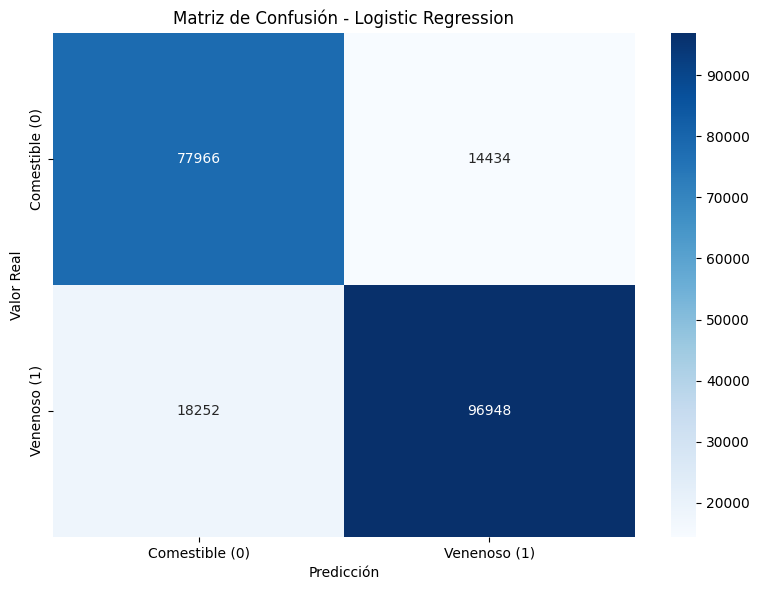

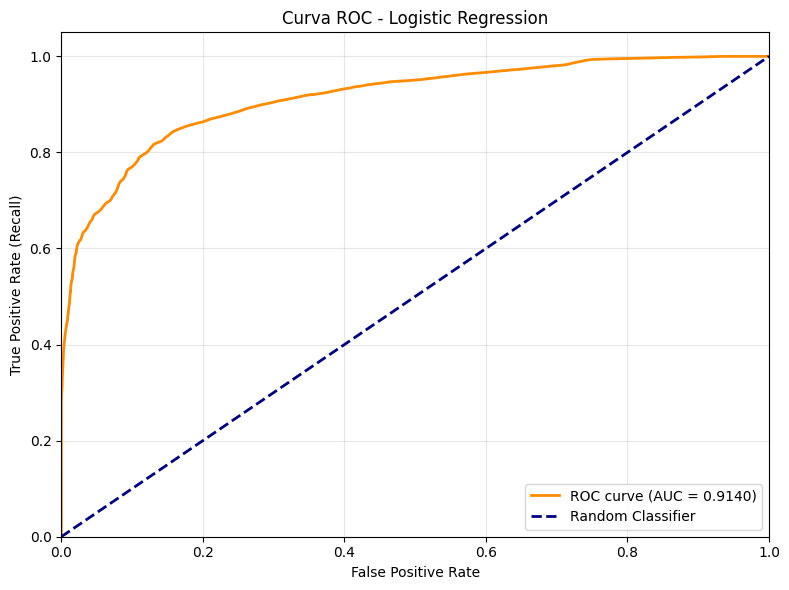

In [27]:
# Visualizaciones para Logistic Regression
plot_confusion_matrix(y_test_lr, y_pred_lr, "Logistic Regression")
plot_roc_curve(y_test_lr, y_pred_proba_lr, "Logistic Regression")

## 3.3. Modelo 2: Naive Bayes (Clasificador Bayesiano)

Naive Bayes es un clasificador probabil√≠stico basado en el teorema de Bayes con la suposici√≥n de independencia condicional entre las caracter√≠sticas. Es r√°pido, eficiente y funciona bien con conjuntos de datos grandes.

In [28]:
# Obtener los datos preprocesados para Naive Bayes
config_nb = model_config['Naive Bayes']
X_train_nb = config_nb['X_train']
X_test_nb = config_nb['X_test']
y_train_nb = config_nb['y_train']
y_test_nb = config_nb['y_test']

# Inicializar y entrenar el modelo
print("Entrenando Naive Bayes (GaussianNB)...")
start_time = time.time()

nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train_nb)

training_time = time.time() - start_time
print(f"‚úì Modelo entrenado en {training_time:.2f} segundos")

# Realizar predicciones
y_pred_nb = nb_model.predict(X_test_nb)
y_pred_proba_nb = nb_model.predict_proba(X_test_nb)[:, 1]

# Evaluar el modelo
metrics_nb = evaluate_model(y_test_nb, y_pred_nb, y_pred_proba_nb, "Naive Bayes")
metrics_nb['Training Time (s)'] = training_time
results.append(metrics_nb)

Entrenando Naive Bayes (GaussianNB)...
‚úì Modelo entrenado en 1.47 segundos

EVALUACI√ìN DEL MODELO: Naive Bayes
Accuracy       : 0.6090
Precision      : 0.9862
Recall         : 0.2995
F1-Score       : 0.4595
ROC-AUC        : 0.8340

Matriz de Confusi√≥n:
[[91916   484]
 [80695 34505]]

Reporte de Clasificaci√≥n:
                precision    recall  f1-score   support

Comestible (0)       0.53      0.99      0.69     92400
  Venenoso (1)       0.99      0.30      0.46    115200

      accuracy                           0.61    207600
     macro avg       0.76      0.65      0.58    207600
  weighted avg       0.78      0.61      0.56    207600



In [29]:
# Visualizaciones para Naive Bayes
plot_confusion_matrix(y_test_nb, y_pred_nb, "Naive Bayes")
plot_roc_curve(y_test_nb, y_pred_proba_nb, "Naive Bayes")

## 3.4. Modelo 3: Decision Tree (√Årbol de Decisi√≥n)

Los √°rboles de decisi√≥n son modelos no param√©tricos que aprenden reglas de decisi√≥n simples a partir de las caracter√≠sticas de los datos. Son altamente interpretables pero propensos al sobreajuste sin regularizaci√≥n adecuada.

In [30]:
# Obtener los datos preprocesados para Decision Tree
config_dt = model_config['Decision Tree']
X_train_dt = config_dt['X_train']
X_test_dt = config_dt['X_test']
y_train_dt = config_dt['y_train']
y_test_dt = config_dt['y_test']

# Inicializar y entrenar el modelo
print("Entrenando Decision Tree...")
start_time = time.time()

dt_model = DecisionTreeClassifier(random_state=42, max_depth=20, min_samples_split=10)
dt_model.fit(X_train_dt, y_train_dt)

training_time = time.time() - start_time
print(f"‚úì Modelo entrenado en {training_time:.2f} segundos")

# Realizar predicciones
y_pred_dt = dt_model.predict(X_test_dt)
y_pred_proba_dt = dt_model.predict_proba(X_test_dt)[:, 1]

# Evaluar el modelo
metrics_dt = evaluate_model(y_test_dt, y_pred_dt, y_pred_proba_dt, "Decision Tree")
metrics_dt['Training Time (s)'] = training_time
results.append(metrics_dt)

Entrenando Decision Tree...
‚úì Modelo entrenado en 5.03 segundos

EVALUACI√ìN DEL MODELO: Decision Tree
Accuracy       : 0.9994
Precision      : 0.9997
Recall         : 0.9992
F1-Score       : 0.9994
ROC-AUC        : 0.9997

Matriz de Confusi√≥n:
[[ 92360     40]
 [    93 115107]]

Reporte de Clasificaci√≥n:
                precision    recall  f1-score   support

Comestible (0)       1.00      1.00      1.00     92400
  Venenoso (1)       1.00      1.00      1.00    115200

      accuracy                           1.00    207600
     macro avg       1.00      1.00      1.00    207600
  weighted avg       1.00      1.00      1.00    207600



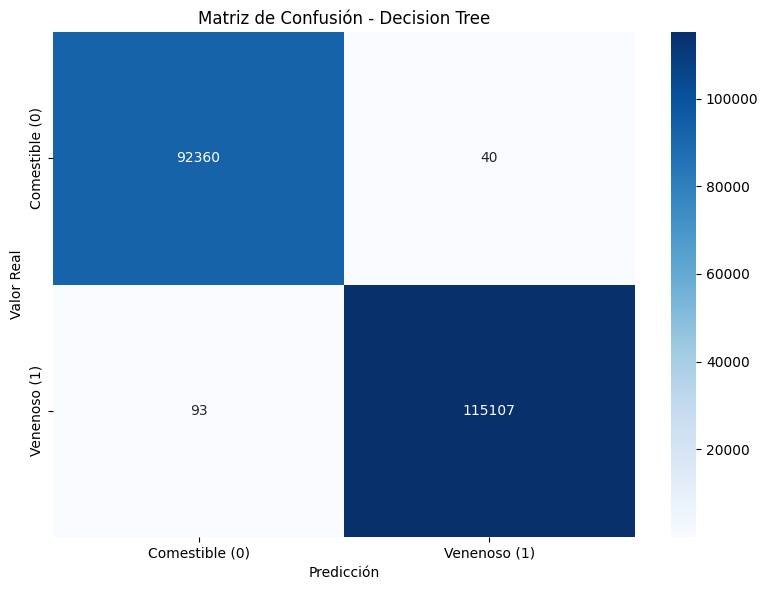

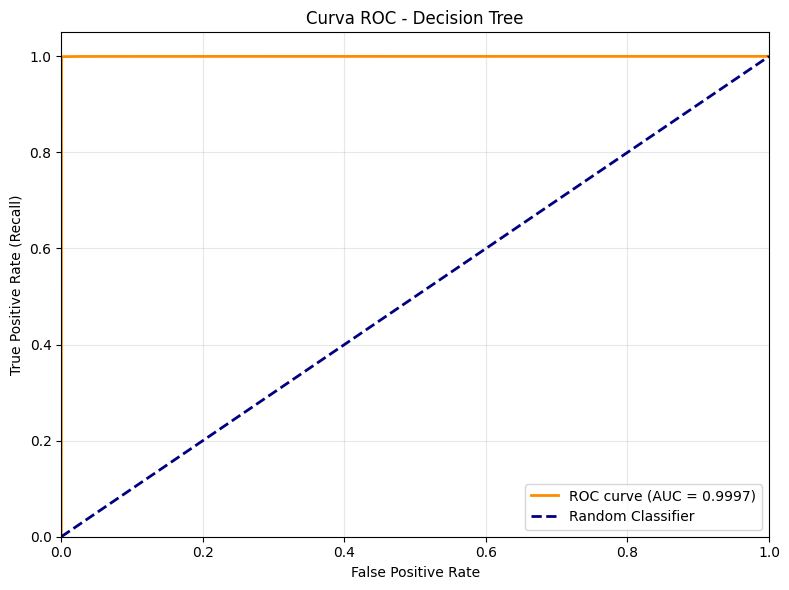

In [31]:
# Visualizaciones para Decision Tree
plot_confusion_matrix(y_test_dt, y_pred_dt, "Decision Tree")
plot_roc_curve(y_test_dt, y_pred_proba_dt, "Decision Tree")

## 3.5. Modelo 4: Random Forest (Bosque Aleatorio)

Random Forest es un m√©todo de ensamble que construye m√∫ltiples √°rboles de decisi√≥n y combina sus predicciones mediante votaci√≥n. Reduce el sobreajuste y generalmente ofrece mejor rendimiento que un √°rbol individual.

In [32]:
# Obtener los datos preprocesados para Random Forest
config_rf = model_config['Random Forest']
X_train_rf = config_rf['X_train']
X_test_rf = config_rf['X_test']
y_train_rf = config_rf['y_train']
y_test_rf = config_rf['y_test']

# Inicializar y entrenar el modelo
print("Entrenando Random Forest...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    max_depth=20, 
    min_samples_split=10,
    n_jobs=-1  # Usar todos los cores disponibles
)
rf_model.fit(X_train_rf, y_train_rf)

training_time = time.time() - start_time
print(f"‚úì Modelo entrenado en {training_time:.2f} segundos")

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test_rf)
y_pred_proba_rf = rf_model.predict_proba(X_test_rf)[:, 1]

# Evaluar el modelo
metrics_rf = evaluate_model(y_test_rf, y_pred_rf, y_pred_proba_rf, "Random Forest")
metrics_rf['Training Time (s)'] = training_time
results.append(metrics_rf)

Entrenando Random Forest...
‚úì Modelo entrenado en 24.29 segundos

EVALUACI√ìN DEL MODELO: Random Forest
Accuracy       : 1.0000
Precision      : 1.0000
Recall         : 1.0000
F1-Score       : 1.0000
ROC-AUC        : 1.0000

Matriz de Confusi√≥n:
[[ 92399      1]
 [     3 115197]]

Reporte de Clasificaci√≥n:
                precision    recall  f1-score   support

Comestible (0)       1.00      1.00      1.00     92400
  Venenoso (1)       1.00      1.00      1.00    115200

      accuracy                           1.00    207600
     macro avg       1.00      1.00      1.00    207600
  weighted avg       1.00      1.00      1.00    207600



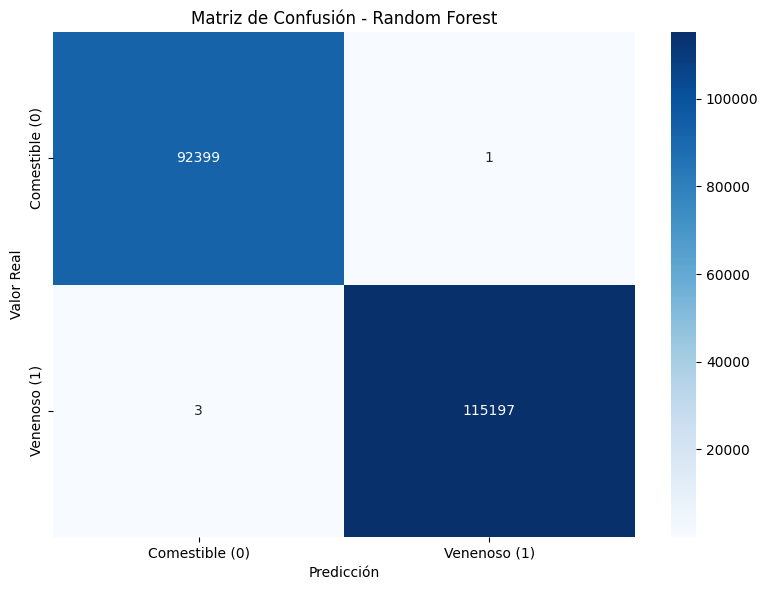

In [33]:
# Visualizaciones para Random Forest
plot_confusion_matrix(y_test_rf, y_pred_rf, "Random Forest")
plot_roc_curve(y_test_rf, y_pred_proba_rf, "Random Forest")

## 3.6. Modelo 5: Gradient Boosting

Gradient Boosting es un m√©todo de ensamble que construye √°rboles de decisi√≥n de forma secuencial, donde cada √°rbol nuevo intenta corregir los errores de los anteriores. Suele ofrecer el mejor rendimiento predictivo, aunque requiere m√°s tiempo de entrenamiento.

In [34]:
# Obtener los datos preprocesados para Gradient Boosting
config_gb = model_config['Gradient Boosting']
X_train_gb = config_gb['X_train']
X_test_gb = config_gb['X_test']
y_train_gb = config_gb['y_train']
y_test_gb = config_gb['y_test']

# Inicializar y entrenar el modelo
print("Entrenando Gradient Boosting...")
start_time = time.time()

gb_model = GradientBoostingClassifier(
    n_estimators=100, 
    random_state=42, 
    max_depth=5,
    learning_rate=0.1,
    min_samples_split=10
)
gb_model.fit(X_train_gb, y_train_gb)

training_time = time.time() - start_time
print(f"‚úì Modelo entrenado en {training_time:.2f} segundos")

# Realizar predicciones
y_pred_gb = gb_model.predict(X_test_gb)
y_pred_proba_gb = gb_model.predict_proba(X_test_gb)[:, 1]

# Evaluar el modelo
metrics_gb = evaluate_model(y_test_gb, y_pred_gb, y_pred_proba_gb, "Gradient Boosting")
metrics_gb['Training Time (s)'] = training_time
results.append(metrics_gb)

Entrenando Gradient Boosting...
‚úì Modelo entrenado en 270.70 segundos

EVALUACI√ìN DEL MODELO: Gradient Boosting
Accuracy       : 0.9925
Precision      : 0.9970
Recall         : 0.9895
F1-Score       : 0.9932
ROC-AUC        : 0.9997

Matriz de Confusi√≥n:
[[ 92059    341]
 [  1209 113991]]

Reporte de Clasificaci√≥n:
                precision    recall  f1-score   support

Comestible (0)       0.99      1.00      0.99     92400
  Venenoso (1)       1.00      0.99      0.99    115200

      accuracy                           0.99    207600
     macro avg       0.99      0.99      0.99    207600
  weighted avg       0.99      0.99      0.99    207600



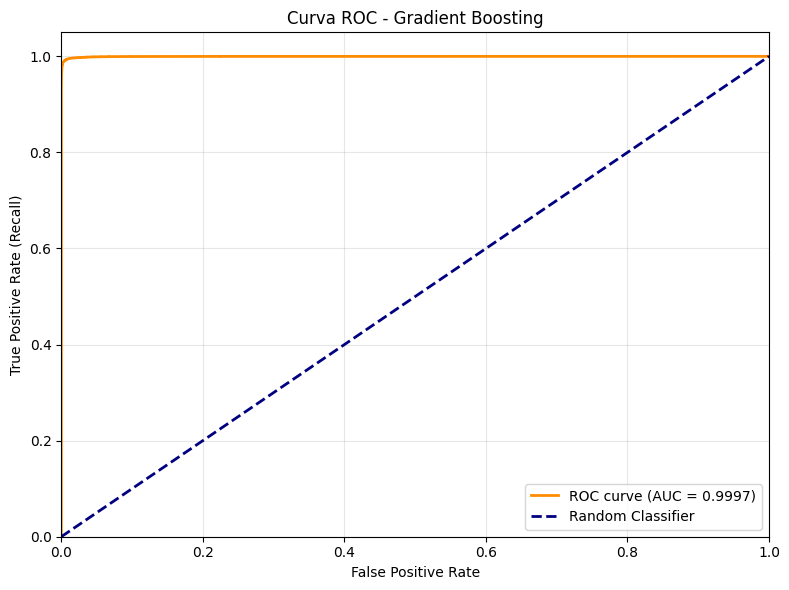

In [35]:
# Visualizaciones para Gradient Boosting
plot_confusion_matrix(y_test_gb, y_pred_gb, "Gradient Boosting")
plot_roc_curve(y_test_gb, y_pred_proba_gb, "Gradient Boosting")

## 3.7. Comparaci√≥n de resultados

Ahora que hemos entrenado y evaluado los 5 modelos, vamos a comparar sus resultados de forma visual y tabular para identificar el modelo con mejor desempe√±o.

In [36]:
# Crear DataFrame con todos los resultados
results_df = pd.DataFrame(results)

# Ordenar por Recall (nuestra m√©trica prioritaria) de mayor a menor
results_df_sorted = results_df.sort_values('Recall', ascending=False)

print("="*80)
print("TABLA COMPARATIVA DE TODOS LOS MODELOS")
print("="*80)
print(results_df_sorted.to_string(index=False))

print("\n" + "="*80)
print("RANKING POR RECALL (M√©trica prioritaria)")
print("="*80)
for idx, row in results_df_sorted.iterrows():
    print(f"{idx+1}. {row['Model']:20s} - Recall: {row['Recall']:.4f}")

TABLA COMPARATIVA DE TODOS LOS MODELOS
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC  Training Time (s)
      Random Forest  0.999981   0.999991 0.999974  0.999983 1.000000          24.289560
      Decision Tree  0.999359   0.999653 0.999193  0.999423 0.999728           5.028885
  Gradient Boosting  0.992534   0.997017 0.989505  0.993247 0.999723         270.696037
Logistic Regression  0.842553   0.870410 0.841562  0.855743 0.914046          12.371447
        Naive Bayes  0.608964   0.986167 0.299523  0.459488 0.833986           1.473724

RANKING POR RECALL (M√©trica prioritaria)
4. Random Forest        - Recall: 1.0000
3. Decision Tree        - Recall: 0.9992
5. Gradient Boosting    - Recall: 0.9895
1. Logistic Regression  - Recall: 0.8416
2. Naive Bayes          - Recall: 0.2995


In [37]:
# Visualizaci√≥n comparativa de m√©tricas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Training Time (s)']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 3, idx % 3]
    
    data = results_df.sort_values(metric, ascending=False if metric != 'Training Time (s)' else True)
    
    bars = ax.barh(data['Model'], data[metric], color=colors)
    ax.set_xlabel(metric)
    ax.set_title(f'Comparaci√≥n: {metric}')
    ax.invert_yaxis()
    
    # A√±adir valores en las barras
    for i, (bar, value) in enumerate(zip(bars, data[metric])):
        width = bar.get_width()
        label_x_pos = width + (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.01
        ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{value:.4f}',
                va='center', fontsize=9)

plt.tight_layout()
plt.show()

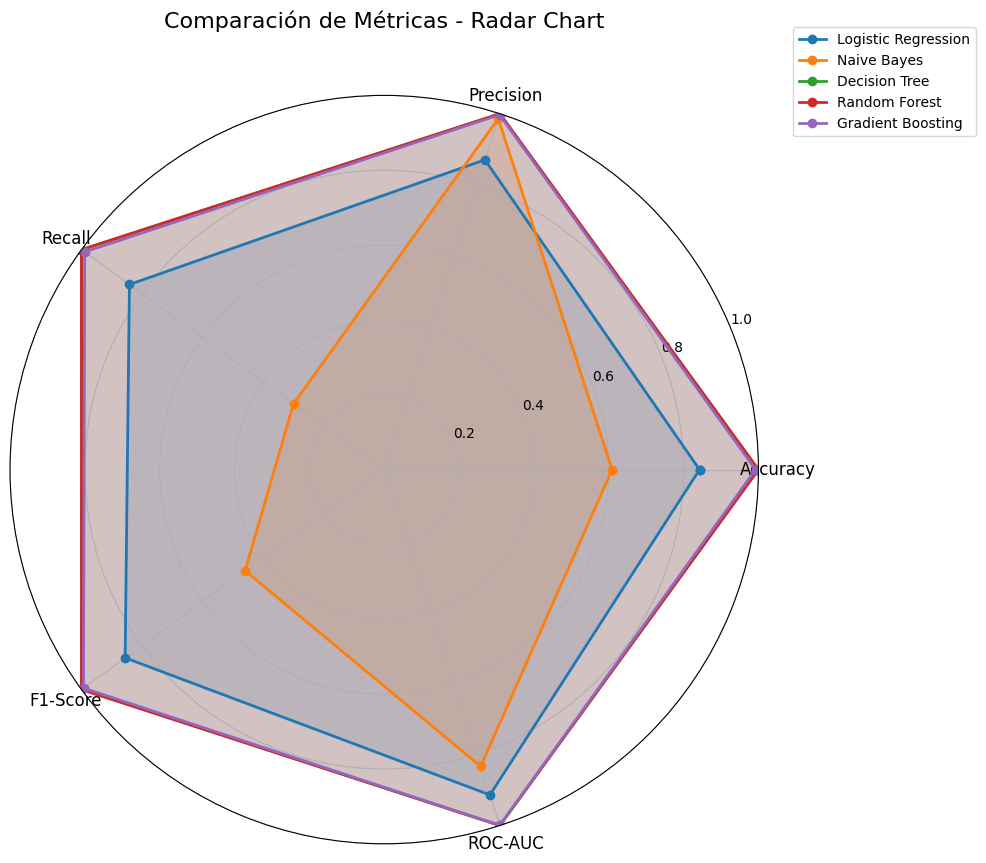

In [38]:
# Comparaci√≥n visual con radar chart
import numpy as np

# Preparar datos para el radar chart (normalizados)
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# √Ångulos para cada m√©trica
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Cerrar el c√≠rculo

# Plotear cada modelo
for idx, row in results_df.iterrows():
    values = [row[cat] for cat in categories]
    values += values[:1]  # Cerrar el c√≠rculo
    
    ax.plot(angles, values, 'o-', linewidth=2, label=row['Model'])
    ax.fill(angles, values, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=12)
ax.set_ylim(0, 1)
ax.set_title('Comparaci√≥n de M√©tricas - Radar Chart', size=16, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

## 3.8. Selecci√≥n del mejor modelo

Bas√°ndonos en los criterios establecidos en la secci√≥n 2.2.4, donde priorizamos **Recall** como m√©trica principal (para minimizar falsos negativos y evitar clasificar hongos venenosos como comestibles), procedemos a seleccionar el mejor modelo.

In [39]:
# Identificar el mejor modelo seg√∫n Recall
best_model_idx = results_df['Recall'].idxmax()
best_model = results_df.loc[best_model_idx]

print("="*80)
print("MEJOR MODELO SEG√öN CRITERIOS ESTABLECIDOS")
print("="*80)
print(f"\nüèÜ Modelo seleccionado: {best_model['Model']}")
print(f"\nüìä M√©tricas del mejor modelo:")
print(f"   - Accuracy:      {best_model['Accuracy']:.4f}")
print(f"   - Precision:     {best_model['Precision']:.4f}")
print(f"   - Recall:        {best_model['Recall']:.4f} ‚≠ê (M√©trica prioritaria)")
print(f"   - F1-Score:      {best_model['F1-Score']:.4f}")
print(f"   - ROC-AUC:       {best_model['ROC-AUC']:.4f}")
print(f"   - Training Time: {best_model['Training Time (s)']:.2f} segundos")

print(f"\nüí° Justificaci√≥n:")
print(f"   El modelo {best_model['Model']} fue seleccionado por presentar el mayor Recall")
print(f"   ({best_model['Recall']:.4f}), lo que minimiza el riesgo cr√≠tico de clasificar hongos")
print(f"   venenosos como comestibles (falsos negativos).")

# Comparar con otros modelos
print(f"\nüìà Comparaci√≥n con otros modelos:")
for idx, row in results_df.iterrows():
    if idx != best_model_idx:
        recall_diff = (best_model['Recall'] - row['Recall']) * 100
        print(f"   - {row['Model']:20s}: Recall = {row['Recall']:.4f} (diferencia: {recall_diff:+.2f}%)")

MEJOR MODELO SEG√öN CRITERIOS ESTABLECIDOS

üèÜ Modelo seleccionado: Random Forest

üìä M√©tricas del mejor modelo:
   - Accuracy:      1.0000
   - Precision:     1.0000
   - Recall:        1.0000 ‚≠ê (M√©trica prioritaria)
   - F1-Score:      1.0000
   - ROC-AUC:       1.0000
   - Training Time: 24.29 segundos

üí° Justificaci√≥n:
   El modelo Random Forest fue seleccionado por presentar el mayor Recall
   (1.0000), lo que minimiza el riesgo cr√≠tico de clasificar hongos
   venenosos como comestibles (falsos negativos).

üìà Comparaci√≥n con otros modelos:
   - Logistic Regression : Recall = 0.8416 (diferencia: +15.84%)
   - Naive Bayes         : Recall = 0.2995 (diferencia: +70.05%)
   - Decision Tree       : Recall = 0.9992 (diferencia: +0.08%)
   - Gradient Boosting   : Recall = 0.9895 (diferencia: +1.05%)
